In [33]:
#PROBLEM 1

import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

#get the datasets from local and save it as a dataframes
url = 'wdbc.data'
dataframe = (pd.read_csv(url, header=None))

#dataframe preprocessing and converting dataframe to array in order to apply kfold
y = dataframe[1].to_numpy()
x = (dataframe.drop(dataframe.columns[[0,1]], axis=1)).to_numpy()

#using 10-fold
kf = KFold(n_splits=10, random_state=7, shuffle=True)

#store indices of train_x, train_y, test_x, test_y
for train_index, test_index in kf.split(x):
  train_x, test_x, train_y, test_y = x[train_index], x[test_index], y[train_index], y[test_index]

#using SVC as classifier
svc = SVC(kernel='linear')

#use the splitted training data for fitting
svc.fit(train_x, train_y)

#use the splitted testing data for accuracy test
test_y_predict = svc.predict(test_x)

#use F score as the performance metric
score_test = f1_score(test_y, test_y_predict, average='micro')

#print the score
print('F1 score: ', score_test)

F1 score:  0.9821428571428571


fpr:  {0: array([0., 0., 0., 1.]), 1: array([0.        , 0.        , 0.        , 0.16666667, 0.16666667,
       1.        ]), 2: array([0.        , 0.        , 0.        , 0.05263158, 0.05263158,
       0.10526316, 0.10526316, 0.21052632, 0.21052632, 1.        ])}
tpr,  {0: array([0.        , 0.14285714, 1.        , 1.        ]), 1: array([0.        , 0.08333333, 0.83333333, 0.83333333, 1.        ,
       1.        ]), 2: array([0.        , 0.09090909, 0.72727273, 0.72727273, 0.81818182,
       0.81818182, 0.90909091, 0.90909091, 1.        , 1.        ])}
threshold:  {0: array([ 3.22648926,  2.22648926,  0.99775028, -0.20887096]), 1: array([ 3.22501838,  2.22501838,  2.15487638,  1.11083883,  1.09704699,
       -0.17828067]), 2: array([3.22371949, 2.22371949, 2.17265876, 2.17193861, 2.16085489,
       2.15566434, 2.12991416, 1.0898445 , 1.08080081, 0.83587107])}
auc:  {0: 1.0, 1: 0.9722222222222223, 2: 0.9665071770334929}


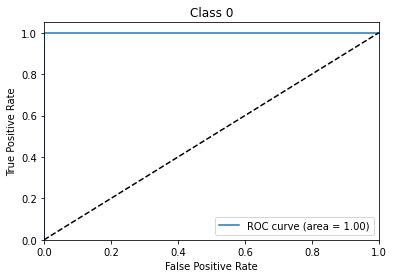

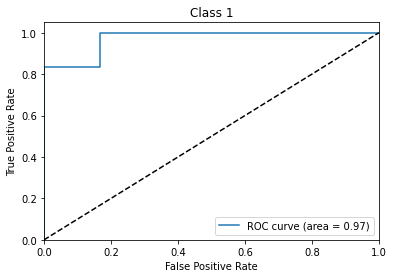

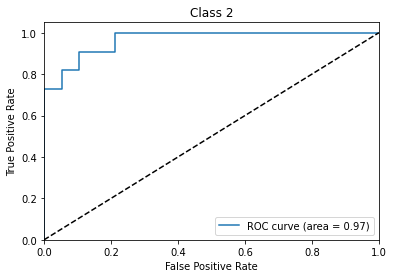

In [35]:
#PROBLEM 2

import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

#get the datasets from local and save them as dataframes
url = 'iris.data'
dataframe = (pd.read_csv(url, header=None))

#dataframe preprocessing
y = dataframe[4]
y = y.replace(['Iris-setosa'], 0)
y = y.replace(['Iris-versicolor'], 1)
y = y.replace(['Iris-virginica'], 2)
y = y.to_numpy()
x = (dataframe.drop(dataframe.columns[[4]], axis=1)).to_numpy()

#split dataset into training and testing data
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=7)

#using SVC as classifier
svc = SVC(kernel='rbf')

#finding the best parameters
parameters = {'kernel':['rbf'], 'C':[0.01, 0.1, 1, 2, 4], 'gamma': [3, 2.9, 2.8, 2.7, 2.6, 2.5, 2.4, 2.3, 2.2, 2.1, 2]}
clf = GridSearchCV(svc, parameters)
clf.fit(train_x, train_y)

#use the splitted testing data for accuracy test
test_y_predict = clf.decision_function(test_x)

#convert class array to binary for roc_curve handling multi-classes
test_y = label_binarize(test_y, classes=[0,1,2])

#use roc_curve and auc
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
threshold = dict()
for i in range(n_classes):
    fpr[i], tpr[i], threshold[i] = roc_curve(test_y[:, i], test_y_predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print('fpr: ', fpr)
print('tpr, ', tpr)
print('threshold: ', threshold)
print('auc: ', roc_auc)

#plot curve
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %i' %i )
    plt.legend(loc="lower right")
    plt.show()